<a href="https://colab.research.google.com/github/caroorozco/Dibujo-de-redes/blob/main/Problema%20de%20redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Costo total del MST: 14.0
Aristas del MST: [('A', 'C', {'weight': 3}), ('B', 'C', {'weight': 2}), ('C', 'D', {'weight': 3}), ('C', 'E', {'weight': 6})]


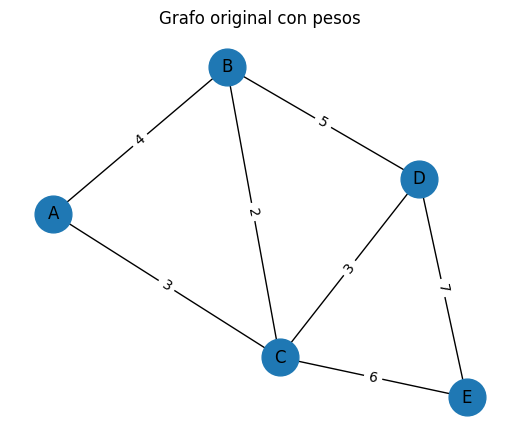

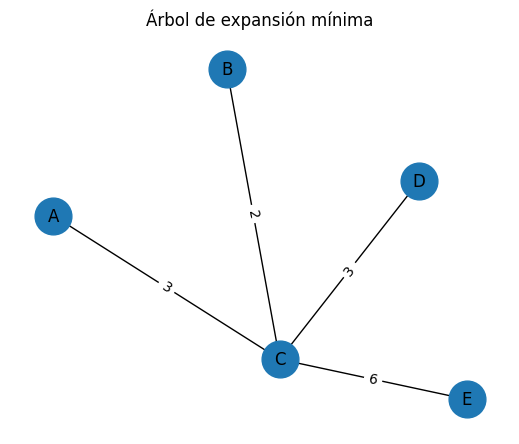

Ruta más corta A→E: ['A', 'B', 'C', 'E'] | Distancia: 8


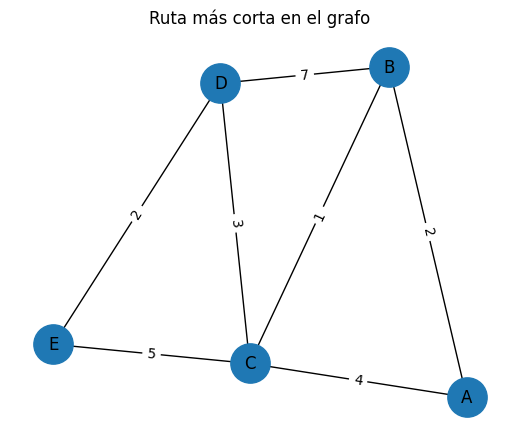

Valor de flujo máximo A→E: 5
Flujos por arista: {'A': {'B': 3, 'C': 2}, 'B': {'C': 1, 'D': 2}, 'C': {'D': 1, 'E': 2}, 'D': {'E': 3}, 'E': {}}


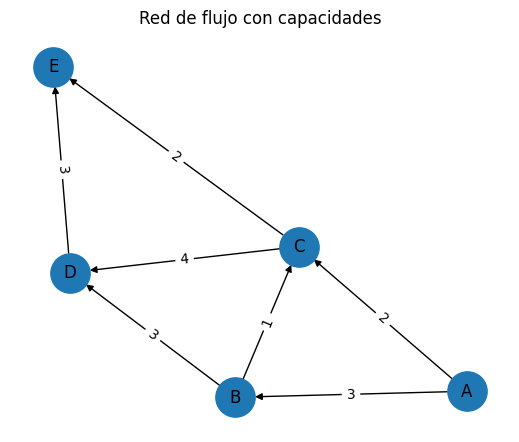

In [1]:
# %% [markdown]
# # Problemas de redes con NetworkX
#
# En este cuaderno voy a resolver tres problemas básicos usando la librería **NetworkX**:
# 1. Árbol de expansión mínima
# 2. Ruta más corta
# 3. Flujo máximo
#
# Cada uno tiene un ejemplo sencillo para entender cómo funciona.

# %% [markdown]
# ## 1) Árbol de expansión mínima
# Queremos conectar todos los nodos de un grafo al menor costo posible.

# %%
import networkx as nx
import matplotlib.pyplot as plt

# Grafo no dirigido con pesos
G1 = nx.Graph()
G1.add_weighted_edges_from([
    ("A","B",4), ("A","C",3),
    ("B","C",2), ("B","D",5),
    ("C","D",3), ("C","E",6),
    ("D","E",7)
])

# Árbol de expansión mínima
T = nx.minimum_spanning_tree(G1, weight="weight")
print("Costo total del MST:", T.size(weight="weight"))
print("Aristas del MST:", list(T.edges(data=True)))

# Dibujar
pos = nx.spring_layout(G1, seed=1)
plt.figure(figsize=(5,4))
nx.draw(G1, pos, with_labels=True, node_size=700)
nx.draw_networkx_edge_labels(G1, pos, edge_labels=nx.get_edge_attributes(G1,'weight'))
plt.title("Grafo original con pesos")
plt.show()

plt.figure(figsize=(5,4))
nx.draw(T, pos, with_labels=True, node_size=700)
nx.draw_networkx_edge_labels(T, pos, edge_labels=nx.get_edge_attributes(T,'weight'))
plt.title("Árbol de expansión mínima")
plt.show()

# %% [markdown]
# ## 2) Ruta más corta
# Buscamos el camino más corto de un nodo a otro.

# %%
G2 = nx.Graph()
G2.add_weighted_edges_from([
    ("A","B",2),
    ("A","C",4),
    ("B","C",1),
    ("B","D",7),
    ("C","D",3),
    ("C","E",5),
    ("D","E",2)
])

# Ruta más corta de A a E
ruta = nx.shortest_path(G2, source="A", target="E", weight="weight")
dist = nx.shortest_path_length(G2, source="A", target="E", weight="weight")
print("Ruta más corta A→E:", ruta, "| Distancia:", dist)

# Dibujar
pos = nx.spring_layout(G2, seed=2)
plt.figure(figsize=(5,4))
nx.draw(G2, pos, with_labels=True, node_size=800)
nx.draw_networkx_edge_labels(G2, pos, edge_labels=nx.get_edge_attributes(G2,'weight'))
plt.title("Ruta más corta en el grafo")
plt.show()

# %% [markdown]
# ## 3) Flujo máximo
# En un grafo dirigido con capacidades, buscamos el flujo máximo de un nodo a otro.

# %%
F = nx.DiGraph()
F.add_edge("A","B", capacity=3)
F.add_edge("A","C", capacity=2)
F.add_edge("B","C", capacity=1)
F.add_edge("B","D", capacity=3)
F.add_edge("C","D", capacity=4)
F.add_edge("C","E", capacity=2)
F.add_edge("D","E", capacity=3)

# Flujo máximo de A a E
valor, flujo = nx.maximum_flow(F, "A", "E", capacity="capacity")
print("Valor de flujo máximo A→E:", valor)
print("Flujos por arista:", flujo)

# Dibujar
pos = nx.spring_layout(F, seed=3)
plt.figure(figsize=(5,4))
nx.draw(F, pos, with_labels=True, node_size=800, arrows=True)
nx.draw_networkx_edge_labels(F, pos, edge_labels=nx.get_edge_attributes(F,'capacity'))
plt.title("Red de flujo con capacidades")
plt.show()

# %% [markdown]
# ---
# ## Conclusión
# Con estos ejemplos vimos cómo usar NetworkX para tres problemas de redes:
# - Encontrar un árbol de expansión mínima.
# - Calcular la ruta más corta.
# - Hallar el flujo máximo en una red.